# Module 3: Logistic Regression

In this assignment, you will
- explore the sigmoid function (also known as the logistic function)
- explore logistic regression; which uses the sigmoid function

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_data


## Sigmoid or Logistic Function
As discussed in the lecture videos, for a classification task, we can start by using our linear regression model, $\h(\mathbf{x}^{(i)}) = \mathbf{w} \cdot  \mathbf{x}^{(i)} + \b$, to predict $y$ given $x$.
- However, we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1.
- This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1.


Let's implement the sigmoid function and see this for ourselves.

## Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model.
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example.
- The implementation of the sigmoid function should cover both of these potential input formats.
Let's implement this in Python.

NumPy has a function called [`exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), which offers a convenient way to calculate the exponential ( $e^{z}$) of all elements in the input array (`z`).

It also works with a single number as an input, as shown below.

In [16]:
# Input is an array.
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.7183  7.3891 20.0855]
Input to exp: 1
Output of exp: 2.718281828459045


The `sigmoid` function is implemented in python as shown in the cell below.

In [17]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """
    #####################################
    # WRITE THE SIGMOID FUNCTION HERE
    g = (1/(1+np.exp(-z)))

    #####################################

    return g

Let's see what the output of this function is for various value of `z`

In [18]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=4) #print option for printing the number of decimal places.
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y]) #(np.c_)combine or concatenate two arrays. 

Input (z), Output (sigmoid(z))
[[-1.0000e+01  4.5398e-05]
 [-9.0000e+00  1.2339e-04]
 [-8.0000e+00  3.3535e-04]
 [-7.0000e+00  9.1105e-04]
 [-6.0000e+00  2.4726e-03]
 [-5.0000e+00  6.6929e-03]
 [-4.0000e+00  1.7986e-02]
 [-3.0000e+00  4.7426e-02]
 [-2.0000e+00  1.1920e-01]
 [-1.0000e+00  2.6894e-01]
 [ 0.0000e+00  5.0000e-01]
 [ 1.0000e+00  7.3106e-01]
 [ 2.0000e+00  8.8080e-01]
 [ 3.0000e+00  9.5257e-01]
 [ 4.0000e+00  9.8201e-01]
 [ 5.0000e+00  9.9331e-01]
 [ 6.0000e+00  9.9753e-01]
 [ 7.0000e+00  9.9909e-01]
 [ 8.0000e+00  9.9966e-01]
 [ 9.0000e+00  9.9988e-01]
 [ 1.0000e+01  9.9995e-01]]


The values in the left column are `z`, and the values in the right column are `sigmoid(z)`. As you can see, the input values to the sigmoid range from -10 to 10, and the output values range from 0 to 1.

Now, let's try to plot this function using the `matplotlib` library.

Text(0.5, 0, 'z')

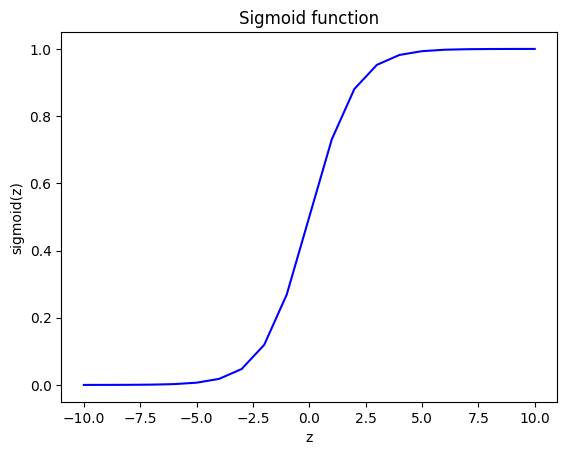

In [19]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1) #(rows, columns,figsize)
ax.plot(z_tmp, y, c="b") 

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

As you can see, the sigmoid function approaches  `0` as `z` goes to large negative values and approaches `1` as `z` goes to large positive values.


## Decision Boundary
 Lets the decision boundary for a logistic regression model. This will give you a better sense of what the model is predicting.



Let's suppose you have following training dataset

*   The input variable X is a numpy array which has 6 training examples, each with two features
*   The output variable y is also a numpy array with 6 examples, and y is either 0 or 1

In [20]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

### Logistic regression model


* Suppose you'd like to train a logistic regression model on this data which has the form   

  $h(x) = g(w_0x_0+w_1x_1 + b)$
  
  where $g(z) = \frac{1}{1+e^{-z}}$, which is the sigmoid function


* Let's say that you trained the model and get the parameters as $b = -3, w_0 = 1, w_1 = 1$. That is,

  $h(x) = g(x_0+x_1-3)$

  (You'll learn how to train/fit and get these parameters in the further sections)
  
  
Let's try to understand what this trained model is predicting by plotting its decision boundary

* Recall that for logistic regression, the model is represented as

  $$h(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{1}$$

  where $g(z)$ is known as the sigmoid function and it maps all input values to values between 0 and 1:

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  and $\mathbf{w} \cdot \mathbf{x}$ is the vector dot product:
  
  $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($h(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $h(x) >= 0.5$, predict $y=1$
  
  if $h(x) < 0.5$, predict $y=0$
  
  
* Let's plot the sigmoid function to see where $g(z) >= 0.5$

## Plotting decision boundary

Now, let's go back to our example to understand how the logistic regression model is making predictions.

* Our logistic regression model has the form

  $h(\mathbf{x}) = g(-3 + x_0+x_1)$


* From what you've learnt above, you can see that this model predicts $y=1$ if $-3 + x_0+x_1 >= 0$

Let's see what this looks like graphically. We'll start by plotting $-3 + x_0+x_1 = 0$, which is equivalent to $x_1 = 3 - x_0$.

[0 1 2 3]


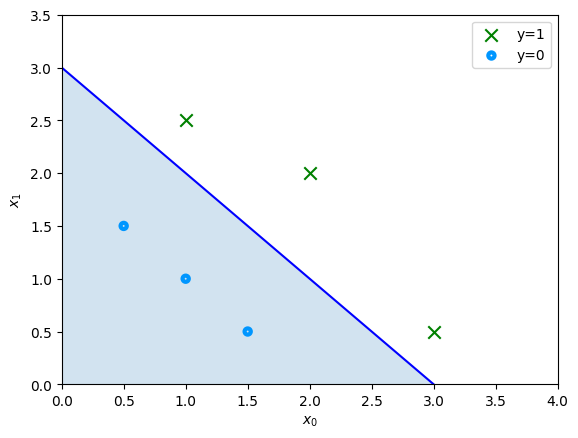

In [35]:
# Choose values between 0 and 4
x0 = np.arange(0,4) 
print(x0)
x1 = 3 - x0
plt.figure()
ax = plt.gca() #get current axes
# Plot the decision boundary
ax.plot(x0,x1, c="b") #c= color
ax.axis([0, 4, 0, 3.5]) #defines the axes for graph ([(0,0),(0,0)])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data

plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

## Train a logistic regression model using scikit-learn

https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html


- Create a Regression Object
- Call fit function
- Get predictions
- Get Score of model
- Get coefficients (w0, w1) and intercept(b)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)



c:\Users\sayee\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [42]:
pred = model.predict(X)
print("Predicted value:",pred)

log_pred = model.predict_log_proba(X)
print("Log Predicted Value: ",log_pred)

prob_pred = model.predict_proba(X)
print("Predicted proabalitiy value: ",prob_pred)

Predicted value: [0 0 0 1 1 1]
Log Predicted Value:  [[-0.378  -1.1559]
 [-0.4053 -1.099 ]
 [-0.4341 -1.0437]
 [-1.1345 -0.388 ]
 [-1.2743 -0.328 ]
 [-0.9191 -0.509 ]]
Predicted proabalitiy value:  [[0.6852 0.3148]
 [0.6668 0.3332]
 [0.6479 0.3521]
 [0.3216 0.6784]
 [0.2796 0.7204]
 [0.3989 0.6011]]


In [44]:
score_model = model.score(X, y)
print("Model Score: ",score_model)

Model Score:  1.0


In [46]:
print(f"Theta/Parameters of the model: w0 = {model.coef_[0][0]}, w1 = {model.coef_[0][1]}, b = {model.intercept_[0]} ")

Theta/Parameters of the model: w0 = 0.9041134943596744, w1 = 0.7358754294504457, b = -2.333716311676968 
